# Fishing optimaly

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import gym 
import gym_fishing

import tensorflow as tf  
from tf_agents.policies import random_tf_policy 
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment

## Discrete action space

In [27]:
discount = 0.99

env_name = 'fishing-v0'

train_py_env = suite_gym.load(env_name, discount = discount)
eval_py_env = suite_gym.load(env_name, discount = discount)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

In [36]:
def simulate(environment) :
  time_step = environment.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))
  
  action = 0
  time_step = environment.step(action)
  episode_return += time_step.reward
  output[0] = (0, time_step.observation, action, episode_return)

  for it in range(1,1000):
    if time_step.reward <= min(time_step.observation - 0.5, 0.0) :
      action = 1
    if time_step.reward > min(time_step.observation - 0.5, 0.0) :
      action = 2

    time_step = environment.step(action)
    episode_return += time_step.reward
    output[it] = (it, time_step.observation, action, episode_return)
  return output    

In [37]:
out = simulate(eval_env)

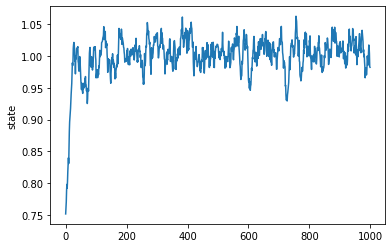

In [39]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.show()

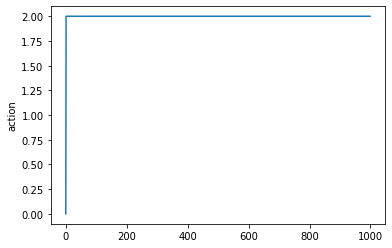

In [34]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.show()

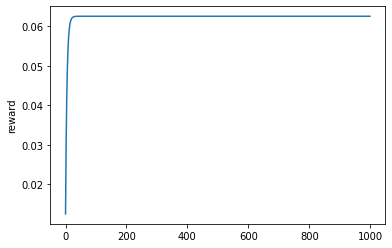

In [40]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.show()

## Continuous action space 

In [107]:
env = gym.make('fishing-v1')

In [108]:
def simul(environment) :
  time_step = environment.reset()
  episode_return = 0.0
  output = np.zeros(shape = (1000, 4))

  for it in range(1000):
    action = np.array([min(time_step[0] - 0.5, 0.0)])
    time_step = environment.step(action)
    episode_return += action
    output[it] = (it, time_step[0], action, episode_return)
  return output 

In [109]:
out=simul(env)

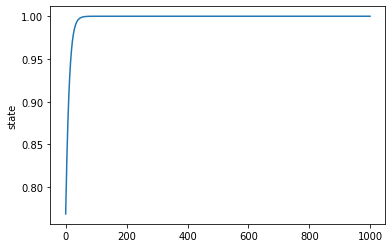

In [110]:
plt.plot(out[:,1])
plt.ylabel('state')
plt.show()

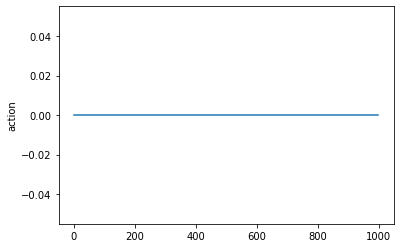

In [111]:
plt.plot(out[:,2])
plt.ylabel('action')
plt.show()

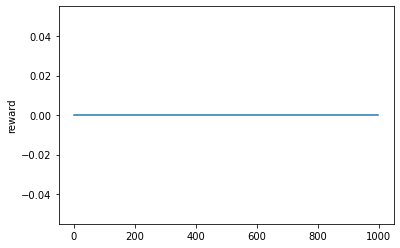

In [112]:
plt.plot(out[:,3])
plt.ylabel('reward')
plt.show()